In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [86]:
train=pd.read_csv("train_LR.csv")
test=pd.read_csv("test_LR.csv")

In [87]:
train.head()

,Tier,FICO,Term,Amount,Previous_Rate,Competition_rate,Rate,Cost_Funds,Partner Bin,Car_Type_N,Car_Type_R,Car_Type_U,Accept
0,2,729,66,22000.0,-10,5.75,6.29,1.1625,1,0,0,1,1
1,1,786,60,37000.0,-10,4.09,4.09,1.1400,2,1,0,0,0
2,1,742,60,25000.0,-10,3.99,3.99,1.1163,3,1,0,0,0
3,1,631,60,25000.0,-10,4.59,4.49,1.6150,1,1,0,0,0
4,4,656,72,27300.0,-10,5.35,7.99,1.1200,1,0,0,1,1


In [88]:
test.head()

,Tier,FICO,Term,Amount,Previous_Rate,Competition_rate,Rate,Cost_Funds,Partner Bin,Car_Type_N,Car_Type_R,Car_Type_U,Accept
0,2,725,72,30500.0,5,6.09,4.99,1.1200,2,0,1,0,0
1,1,739,60,25995.0,-10,4.79,4.79,1.9590,2,0,0,1,0
2,2,715,48,30000.0,5,5.19,4.79,1.1200,2,0,1,0,0
3,1,742,60,45000.0,-10,4.59,4.59,1.5788,3,1,0,0,0
4,4,649,60,27900.0,-10,4.49,6.99,1.3206,3,1,0,0,1


In [89]:
train.shape

(109244, 13)

In [90]:
train.replace(r'^\s*$', np.nan, regex=True, inplace=True)
train.dropna(inplace=True)
train.shape

(109244, 13)

In [91]:
test.shape

(36415, 13)

In [92]:
test.replace(r'^\s*$', np.nan, regex=True, inplace=True)
test.dropna(inplace=True)
test.shape

(36415, 13)

In [93]:
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]

In [94]:
X_train.head()

,Tier,FICO,Term,Amount,Previous_Rate,Competition_rate,Rate,Cost_Funds,Partner Bin,Car_Type_N,Car_Type_R,Car_Type_U
0,2,729,66,22000.0,-10,5.75,6.29,1.1625,1,0,0,1
1,1,786,60,37000.0,-10,4.09,4.09,1.1400,2,1,0,0
2,1,742,60,25000.0,-10,3.99,3.99,1.1163,3,1,0,0
3,1,631,60,25000.0,-10,4.59,4.49,1.6150,1,1,0,0
4,4,656,72,27300.0,-10,5.35,7.99,1.1200,1,0,0,1


In [95]:
y_train.head()

,Accept
0,1
1,0
2,0
3,0
4,1


In [96]:
y_train.value_counts()

,count
Accept,
0,85258
1,23986


In [97]:
((y_train==0).sum()/y_train.shape[0])*100

78.0436454175973

In [116]:
((y_train==1).sum()/y_train.shape[0])*100

21.956354582402696

In [99]:
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

In [100]:
X_test.head()

,Tier,FICO,Term,Amount,Previous_Rate,Competition_rate,Rate,Cost_Funds,Partner Bin,Car_Type_N,Car_Type_R,Car_Type_U
0,2,725,72,30500.0,5,6.09,4.99,1.1200,2,0,1,0
1,1,739,60,25995.0,-10,4.79,4.79,1.9590,2,0,0,1
2,2,715,48,30000.0,5,5.19,4.79,1.1200,2,0,1,0
3,1,742,60,45000.0,-10,4.59,4.59,1.5788,3,1,0,0
4,4,649,60,27900.0,-10,4.49,6.99,1.3206,3,1,0,0


In [101]:
y_test.head()

,Accept
0,0
1,0
2,0
3,0
4,1


In [104]:
y_test.value_counts()

,count
Accept,
0,28350
1,8065


In [103]:
((y_test==0).sum()/y_test.shape[0])*100

77.85253329671839

In [105]:
((y_test==1).sum()/y_test.shape[0])*100

22.147466703281616

In [106]:
model=LogisticRegression(random_state=17)
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [107]:
print(y_pred_train.shape)
print(y_pred_test.shape)

(109244,)
(36415,)


In [110]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88     85258
           1       0.62      0.31      0.42     23986

    accuracy                           0.81    109244
   macro avg       0.73      0.63      0.65    109244
weighted avg       0.78      0.81      0.78    109244



In [115]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     28350
           1       0.61      0.31      0.41      8065

    accuracy                           0.80     36415
   macro avg       0.72      0.63      0.65     36415
weighted avg       0.78      0.80      0.78     36415



[[26751  1599]
 [ 5577  2488]]


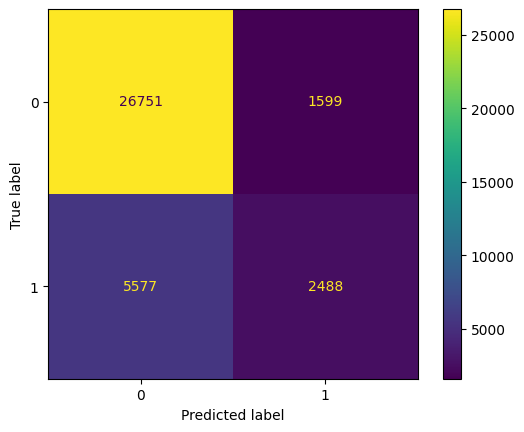

In [113]:
cm=confusion_matrix(y_test,y_pred_test)
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [114]:
confusion_matrix(y_test,y_pred_test).ravel()

array([26751,  1599,  5577,  2488])